In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic
!unzip titanic.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 25.8MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import lazypredict

In [5]:
training= pd.read_csv("train.csv")
training =training.sample(frac=1)
test=pd.read_csv("test.csv")

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 95 to 293
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S


In [9]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
training.drop(["Name","Ticket","PassengerId","Cabin"],inplace=True,axis=1)
training['Sex'].replace("female",1,inplace=True)
training['Sex'].replace("male",0,inplace=True)
test.drop(["Name","Ticket","Cabin"],inplace=True,axis=1)
test['Sex'].replace('female',1,inplace=True)
test['Sex'].replace('male',0,inplace=True)

In [11]:
training["Age"].fillna(training["Age"].mean(),inplace=True)
test["Age"].fillna(test["Age"].mean(),inplace=True)
test["Fare"].fillna(test["Fare"].mode().values[0],inplace=True)

In [12]:
training.dropna(how="any",inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
training["Embarked"]=scaler.fit_transform(training["Embarked"])

In [14]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
test["Embarked"]=scaler.fit_transform(test["Embarked"])

In [15]:
test.loc[test["Fare"].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [16]:
# for i in training.columns:
#   print(i,training[i].nunique(),training[i].unique())

for i in test.columns:
  print(i,test[i].nunique(),test[i].unique())

test.info()

PassengerId 418 [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 

In [17]:
training

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
95,0,3,0,29.699118,0,0,8.0500,2
583,0,1,0,36.000000,0,0,40.1250,0
667,0,3,0,29.699118,0,0,7.7750,2
742,1,1,1,21.000000,2,2,262.3750,0
369,1,1,1,24.000000,0,0,69.3000,0
...,...,...,...,...,...,...,...,...
448,1,3,1,5.000000,2,1,19.2583,0
663,0,3,0,36.000000,0,0,7.4958,2
471,0,3,0,38.000000,0,0,8.6625,2
797,1,3,1,31.000000,0,0,8.6833,2


In [18]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 95 to 293
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
training[["Fare"]]=scaler.fit_transform(training[["Fare"]])
training[["Age"]]=scaler.fit_transform(training[["Age"]])

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
test[["Fare","Age"]]=scaler.fit_transform(test[["Fare","Age"]])

In [21]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,0.452723,0,0,0.015282,1
1,893,3,1,0.617566,1,0,0.013663,2
2,894,2,0,0.815377,0,0,0.018909,1
3,895,3,0,0.353818,0,0,0.016908,2
4,896,3,1,0.287881,1,1,0.023984,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,0.396975,0,0,0.015713,2
414,1306,1,1,0.512066,0,0,0.212559,0
415,1307,3,0,0.505473,0,0,0.014151,2
416,1308,3,0,0.396975,0,0,0.015713,2


In [22]:
y_train = training['Survived']
x_train = training.drop('Survived',axis=1)
x_test=test.drop('PassengerId',axis=1)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [24]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
147,3,1,0.107816,2,2,0.067096,2
279,3,1,0.434531,1,1,0.039525,2
603,3,0,0.547625,0,0,0.015713,2
246,3,1,0.308872,0,0,0.015176,2
762,3,0,0.246042,0,0,0.014110,0
...,...,...,...,...,...,...,...
844,3,0,0.208344,0,0,0.016908,2
767,3,1,0.377984,0,0,0.015127,1
798,3,0,0.371701,0,0,0.014110,0
866,2,1,0.334004,1,0,0.027050,0


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(x_train, y_train)

In [26]:
logpred=model.predict(x_test)
model.score(x_val,y_val)

0.8370786516853933

In [27]:
models=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

models.compile(optimizer='adam',loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [28]:
history = models.fit(x_train,y_train,validation_data =(x_val,y_val),epochs =120)


Epoch 1/120


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 1s 14ms/step - loss: 0.5927 - accuracy: 0.6610 - val_loss: 0.5333 - val_accuracy: 0.7809
Epoch 2/120
21/23 [==========================>...] - ETA: 0s - loss: 0.4760 - accuracy: 0.8065

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7975 - val_loss: 0.4778 - val_accuracy: 0.7697
Epoch 3/120
23/23 [==============================] - 0s 4ms/step - loss: 0.4750 - accuracy: 0.7707 - val_loss: 0.4542 - val_accuracy: 0.8371
Epoch 4/120
23/23 [==============================] - 0s 4ms/step - loss: 0.4387 - accuracy: 0.8017 - val_loss: 0.4374 - val_accuracy: 0.8315
Epoch 5/120
23/23 [==============================] - 0s 4ms/step - loss: 0.4421 - accuracy: 0.7918 - val_loss: 0.4347 - val_accuracy: 0.8483
Epoch 6/120
23/23 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.8003 - val_loss: 0.4253 - val_accuracy: 0.8258
Epoch 7/120
23/23 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8003 - val_loss: 0.4446 - val_accuracy: 0.8539
Epoch 8/120
23/23 [==============================] - 0s 4ms/step - loss: 0.4253 - accuracy: 0.8017 - val_loss: 0.4390 - val_accuracy: 0.8427
Epoch 9/120
23/23 [======

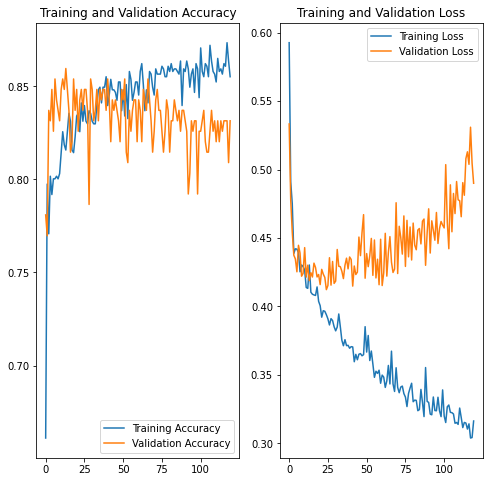

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(120)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [31]:
predictions=models.predict(x_test)
pred=[]
for i in range (len(predictions)):
  if(predictions[i]>0.5):
    pred.append(1)
  else:
    pred.append(0)
pred

14/14 [==============================] - 0s 2ms/step


[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


Comparing different ML models 

In [32]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
### fitting data in LazyClassifier
models,predictions = clf.fit(x_train, x_val, y_train, y_val)
### lets check which model did better
print(models)

100%|██████████| 29/29 [00:02<00:00, 14.13it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.86               0.85     0.85      0.86   
ExtraTreesClassifier               0.85               0.84     0.84      0.85   
NuSVC                              0.84               0.83     0.83      0.84   
LinearDiscriminantAnalysis         0.84               0.83     0.83      0.84   
RidgeClassifierCV                  0.84               0.83     0.83      0.84   
RidgeClassifier                    0.84               0.83     0.83      0.84   
BaggingClassifier                  0.84               0.83     0.83      0.84   
CalibratedClassifierCV             0.84               0.83     0.83      0.84   
KNeighborsClassifier               0.83               0.82     0.82      0.83   
RandomForestClassifier             0.84               0.82     0.82      0.83   
XGBClassifier               

In [33]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='reg:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
xgbc.fit(x_train, y_train)
ypred = xgbc.predict(x_test)
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
data = {'PassengerId':test["PassengerId"],'Survived':logpred}
df=pd.DataFrame(data)
df
df.to_csv('gender_submission.csv', index=False)

In [36]:
!kaggle competitions submit -c titanic -f gender_submission.csv -m "submission"

100% 2.77k/2.77k [00:02<00:00, 1.30kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster